# 1.Necessary Libraries

In [53]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

# 2.Load The Given Dataset into tool

In [54]:
df=pd.read_csv("Mall_Customers.csv")

In [55]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# 3.Visualizations 

# 3.1 Univariate Analysis

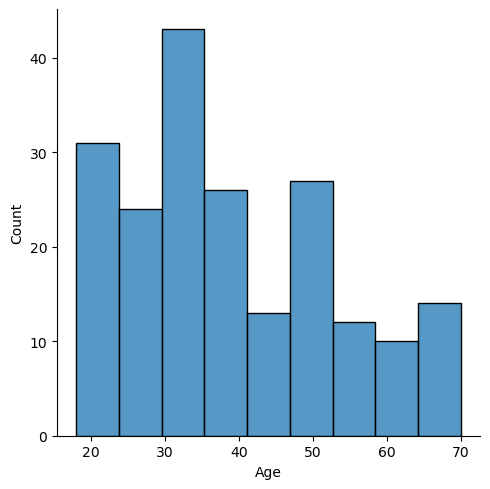

In [56]:
sns.displot(df['Age'])

# 3.2 Bivariate Analysis 

C:\Users\Dhamu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

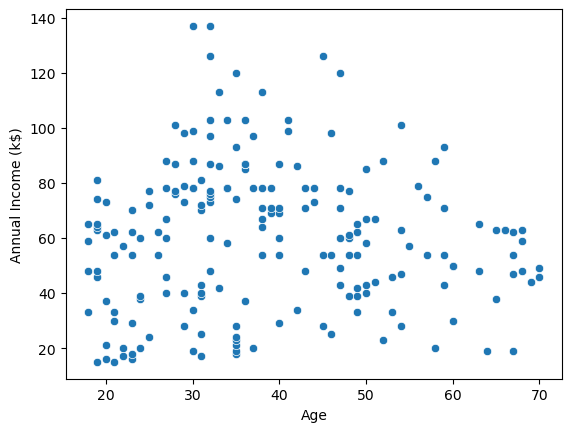

In [57]:
sns.scatterplot(df['Age'],df['Annual Income (k$)'])

C:\Users\Dhamu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

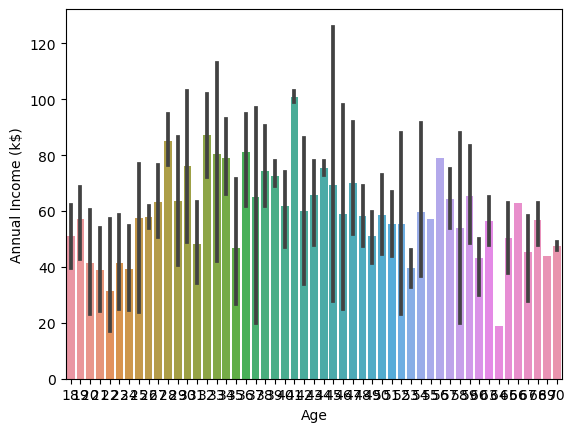

In [58]:
sns.barplot(df['Age'],df['Annual Income (k$)'])

# 3.3 Multivariate Analysis

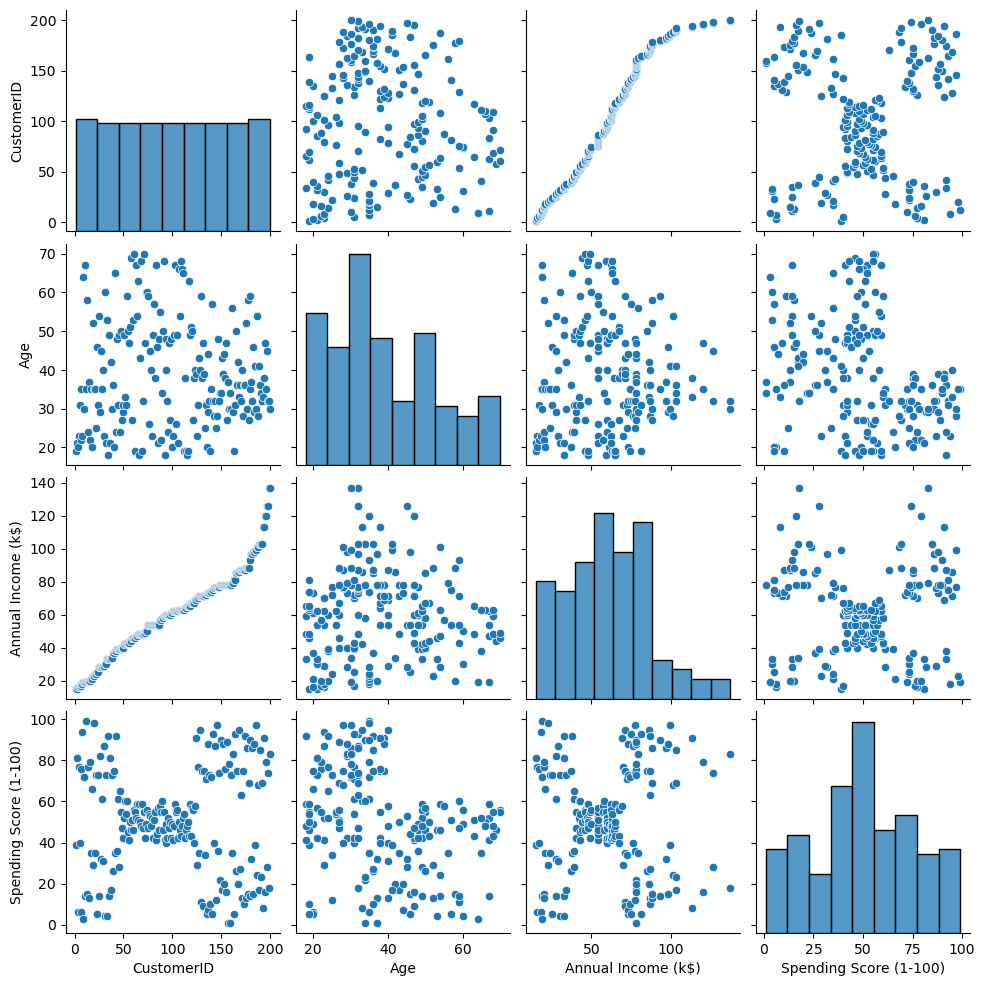

In [59]:
sns.pairplot(df)

# 4.Descriptive Statistics On The Dataset

In [60]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# 5.Check For Missing Values

In [61]:
df.isnull()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [62]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# 6.Find The Outliers And Replace The Outliers

C:\Users\Dhamu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual Income (k$)'>

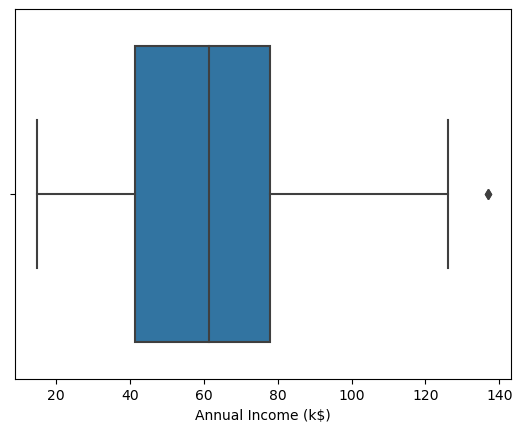

In [63]:
sns.boxplot(df['Annual Income (k$)'])

C:\Users\Dhamu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

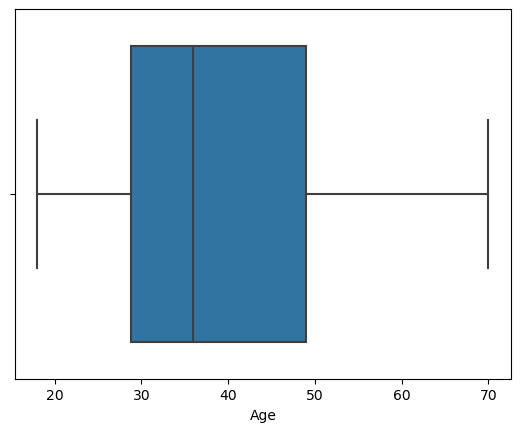

In [64]:
sns.boxplot(df['Age'])

# 7.Check For Categorical Columns And Perform Encoding

In [65]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Label Encoding

In [66]:
from sklearn.preprocessing import LabelEncoder

In [67]:
l=LabelEncoder()

In [68]:
df.Gender=l.fit_transform(df.Gender)

In [69]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


# 8.Scaling The Data 

In [70]:
from sklearn.preprocessing import scale

In [71]:
df=pd.DataFrame(scale(df),columns=df.columns)

In [72]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,-1.723412,1.128152,-1.424569,-1.738999,-0.434801
1,-1.706091,1.128152,-1.281035,-1.738999,1.195704
2,-1.688771,-0.886405,-1.352802,-1.700830,-1.715913
3,-1.671450,-0.886405,-1.137502,-1.700830,1.040418
4,-1.654129,-0.886405,-0.563369,-1.662660,-0.395980


# 9.Perform any of the clustering algorithms

In [73]:
from sklearn import cluster

In [74]:
error=[]
for i in range(1,15):
    kmeans=cluster.KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(df)
    error.append(kmeans.inertia_)

C:\Users\Dhamu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


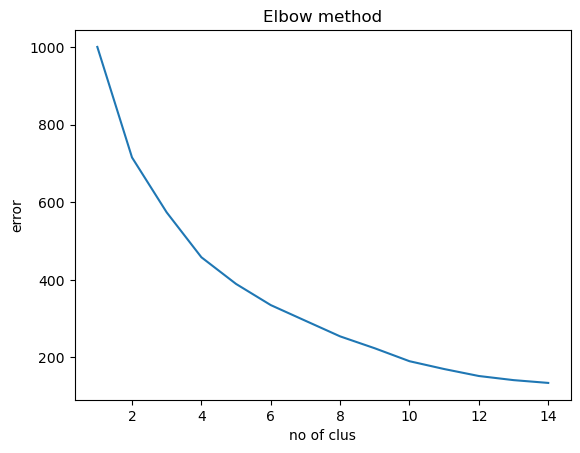

In [75]:
import matplotlib.pyplot as plt
plt.plot(range(1,15),error)
plt.title('Elbow method')
plt.xlabel('no of clus')
plt.ylabel('error')
plt.show()

In [76]:
km_model=cluster.KMeans(n_clusters=11,init='k-means++',random_state=2)

In [77]:
km_model.fit(df)

KMeans(n_clusters=11, random_state=2)

In [78]:
target=km_model.predict(df)
target

array([ 4,  4,  9, 10,  9, 10,  9, 10,  2, 10,  2, 10,  9, 10,  9,  4,  9,
        4,  2, 10,  4,  4,  9,  4,  9,  4,  9,  4,  9, 10,  2, 10,  2,  4,
        9, 10,  9, 10,  9, 10,  6,  4,  2, 10,  9, 10,  6,  0,  0,  0,  6,
        4,  0,  2,  6,  2,  6,  2,  0,  2,  2,  8,  6,  6,  2,  8,  6,  6,
        8,  0,  2,  6,  6,  6,  2,  8,  6,  8,  0,  6,  2,  8,  2,  6,  0,
        2,  6,  0,  0,  6,  6,  8,  2,  0,  0,  8,  6,  0,  2,  8,  0,  6,
        2,  8,  2,  0,  6,  2,  2,  2,  2,  0,  0,  8,  0,  0,  6,  6,  6,
        6,  8,  0,  0,  5,  0,  3,  1,  5,  1,  5,  1,  5,  0,  3,  1,  3,
        7,  5,  1,  3,  7,  5,  0,  3,  1,  5,  1,  3,  7,  5,  1,  5,  7,
        3,  7,  3,  1,  3,  1,  3,  7,  3,  1,  3,  1,  3,  1,  3,  7,  5,
        1,  5,  1,  5,  7,  3,  1,  5,  1,  5,  7,  3,  1,  3,  7,  5,  7,
        5,  7,  3,  7,  3,  1,  3,  7,  3,  7,  5,  1,  5])

# 10.Add The Cluster Data With The Primary Dataset

In [79]:
df['Target Customers']=target

In [80]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Target Customers
0,-1.723412,1.128152,-1.424569,-1.738999,-0.434801,4
1,-1.706091,1.128152,-1.281035,-1.738999,1.195704,4
2,-1.688771,-0.886405,-1.352802,-1.700830,-1.715913,9
3,-1.671450,-0.886405,-1.137502,-1.700830,1.040418,10
4,-1.654129,-0.886405,-0.563369,-1.662660,-0.395980,9


# 11.Split the data into Dependent and Independent Variables.

In [81]:
x=df.drop(columns=['Target Customers'],axis=1)

In [82]:
x

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,-1.723412,1.128152,-1.424569,-1.738999,-0.434801
1,-1.706091,1.128152,-1.281035,-1.738999,1.195704
2,-1.688771,-0.886405,-1.352802,-1.700830,-1.715913
3,-1.671450,-0.886405,-1.137502,-1.700830,1.040418
4,-1.654129,-0.886405,-0.563369,-1.662660,-0.395980
...,...,...,...,...,...
195,1.654129,-0.886405,-0.276302,2.268791,1.118061
196,1.671450,-0.886405,0.441365,2.497807,-0.861839
197,1.688771,1.128152,-0.491602,2.497807,0.923953
198,1.706091,1.128152,-0.491602,2.917671,-1.250054


In [83]:
y=df['Target Customers']

In [84]:
y

0       4
1       4
2       9
3      10
4       9
       ..
195     3
196     7
197     5
198     1
199     5
Name: Target Customers, Length: 200, dtype: int32

# 12.Split the data into training and testing

In [85]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(x, y, test_size=0.2, random_state=2)

In [86]:
X_Train.shape,X_Test.shape

((160, 5), (40, 5))

In [87]:
X_Train.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
137,0.649527,1.128152,-0.491602,0.474828,0.885132
163,1.099866,-0.886405,-0.563369,0.780183,1.661563
111,0.199188,-0.886405,-1.424569,0.093133,0.147522
123,0.407037,1.128152,0.010765,0.322150,1.583920
109,0.164547,1.128152,1.948466,0.093133,-0.085407


In [88]:
X_Test.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
112,0.216509,-0.886405,-0.061002,0.131303,-0.318337
29,-1.221111,-0.886405,-1.137502,-1.204627,1.428633
182,1.428960,1.128152,0.513132,1.429063,-1.366519
199,1.723412,1.128152,-0.635135,2.917671,1.273347
193,1.619488,-0.886405,-0.061002,2.001605,1.583920


In [89]:
Y_Train.head()

137    5
163    3
111    0
123    5
109    2
Name: Target Customers, dtype: int32

In [90]:
Y_Test.head()

112     0
29     10
182     1
199     5
193     3
Name: Target Customers, dtype: int32

# 13.Build The Model 

In [91]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10,criterion='entropy')

In [92]:
model.fit(X_Train,Y_Train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [93]:
y_pred_test=model.predict(X_Test)

In [94]:
y_pred_train=model.predict(X_Train)

# 14.Train The Model

In [95]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [96]:
print('Training Accuracy',accuracy_score(Y_Train,y_pred_train))

Training Accuracy 1.0


# 15.Test The Model

In [97]:
print('Testing Accuracy',accuracy_score(Y_Test,y_pred_test))

Testing Accuracy 0.925


# 16.Measure the performance using Evaluation Metrics.

In [98]:
pd.crosstab(Y_Test,y_pred_test)

col_0,0,1,2,3,4,5,6,7,8,9,10
Target Customers,,,,,,,,,,,
0,5,0,0,0,0,0,0,0,0,0,0
1,0,6,0,0,0,0,0,0,0,0,0
2,0,0,6,0,0,0,0,0,0,0,0
3,0,0,0,2,0,0,0,0,0,0,0
4,0,0,0,0,2,0,0,0,0,0,0
5,0,0,0,0,0,3,0,0,0,0,0
6,0,0,0,0,0,0,2,0,0,0,0
7,0,0,0,0,0,0,0,1,0,0,0
8,0,0,0,0,0,0,0,0,2,0,0


In [99]:
print(classification_report(Y_Test,y_pred_test))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         2
           4       0.67      1.00      0.80         2
           5       1.00      1.00      1.00         3
           6       0.67      1.00      0.80         2
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         2
           9       1.00      0.60      0.75         5
          10       1.00      0.83      0.91         6

    accuracy                           0.93        40
   macro avg       0.92      0.95      0.92        40
weighted avg       0.95      0.93      0.92        40

